In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641561 sha256=99830950be4f57841f06d81e45537d45efa38cd387ae49eea6901620c43ac733
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import datetime

## Lectura de archivo

In [ ]:
df = pd.read_csv('data_test.csv')

## Exploratory Data Analysis

In [ ]:
df.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status
0,53,10,18660729,8/23/21 00:00,1490.46,0.00,PAID
1,93,11,18660730,3/22/21 00:00,6418.28,624.48,PAID
2,122,12,18660731,2/18/21 00:00,27979.20,10520.15,PAID
3,85,13,18660732,3/15/21 00:00,183070.77,79421.63,PAID
4,87,14,18660733,7/23/21 00:00,20532.00,20532.00,PAID


In [ ]:
df.describe()

,PayerId,ReceiverId,invoiceId,amount,amountfinancedByXepelin
count,1200.000000,1200.000000,1.200000e+03,1.200000e+03,1.200000e+03
mean,101.567500,60.290000,1.866133e+07,2.785217e+04,1.749303e+04
std,57.232888,40.187333,3.465545e+02,1.414899e+05,1.229016e+05
min,1.000000,10.000000,1.866073e+07,5.816000e+01,0.000000e+00
25%,52.000000,16.000000,1.866103e+07,1.251810e+03,0.000000e+00
50%,103.000000,58.000000,1.866133e+07,1.490460e+03,0.000000e+00
75%,151.250000,89.500000,1.866163e+07,4.120858e+03,0.000000e+00
max,200.000000,154.000000,1.866193e+07,3.370742e+06,3.370742e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PayerId                  1200 non-null   int64  
 1   ReceiverId               1200 non-null   int64  
 2   invoiceId                1200 non-null   int64  
 3   paidAt                   892 non-null    object 
 4   amount                   1200 non-null   float64
 5   amountfinancedByXepelin  1200 non-null   float64
 6   status                   1200 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 65.8+ KB


In [ ]:
df.isnull().sum()

PayerId                      0
ReceiverId                   0
invoiceId                    0
paidAt                     308
amount                       0
amountfinancedByXepelin      0
status                       0
dtype: int64

In [ ]:
df['status'].unique()

array(['PAID', 'PROCESSING', 'FAILED'], dtype=object)

Facturas en estado PAID : 892 que corresponden al 74.33333333333333% de las facturas 
Facturas en estado PROCESSING : 269 que corresponden al 22.416666666666664% de las facturas 
Facturas en estado FAILED : 39 que corresponden al 3.25% de las facturas 


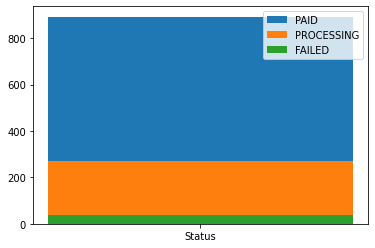

In [ ]:
tipo = df['status'].unique()
for i in range(len(tipo)):
  print('Facturas en estado {} : {} que corresponden al {}% de las facturas '.format(tipo[i],len(df[df['status'] == tipo[i]]),(len(df[df['status'] == tipo[i]])/1200)*100))
  plt.bar(x=['Status'],height= len(df[df['status'] == tipo[i]]))
plt.legend(tipo)
plt.show()

Amount financed by Xepelin

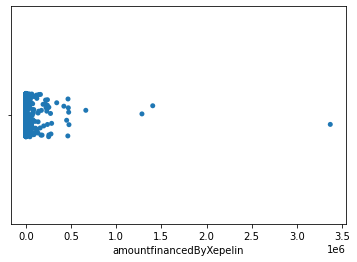

In [ ]:
sns.stripplot(x='amountfinancedByXepelin', data=df) 
plt.show()

Amount

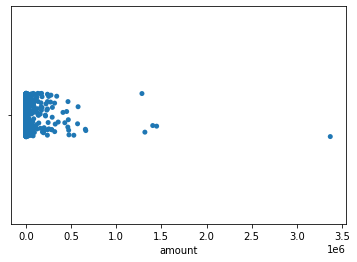

In [ ]:
sns.stripplot(x='amount', data=df) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


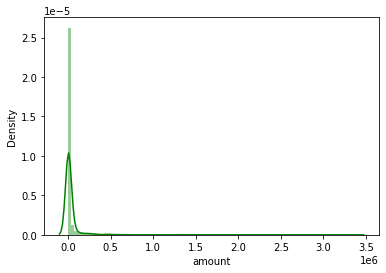

In [ ]:
sns.distplot(df['amount'], color='g', bins=100, hist_kws={'alpha': 0.4})

Se visualiza un extracto del gráfico anterior para obtener un mayor conocimiento del comportamiento de los datos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


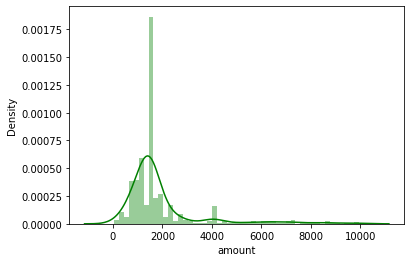

In [ ]:
sns.distplot(df[df['amount']< 10000]['amount'], color='g', bins=50, hist_kws={'alpha': 0.4})

### Por el contexto del problema, a continuacion se analizan los datos en estado 'PAID'.

In [ ]:
df_Paid = df.copy()

df_Paid = df_Paid[df_Paid['status'] == 'PAID']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


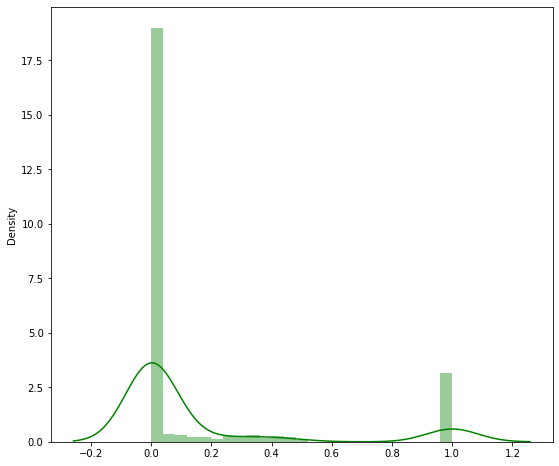

In [ ]:
plt.figure(figsize=(9, 8))
sns.distplot(df_Paid['amountfinancedByXepelin']/df_Paid['amount'], color='g', bins=25, hist_kws={'alpha': 0.4})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


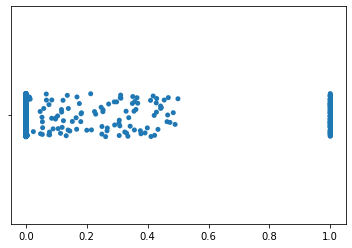

In [ ]:
sns.stripplot(df_Paid['amountfinancedByXepelin']/df_Paid['amount'])
plt.show()

In [ ]:
max_finance = df_Paid[((df_Paid['amountfinancedByXepelin']/df_Paid['amount']) < 1) ]
max(max_finance['amountfinancedByXepelin']/max_finance['amount'])

0.4994641132180105

Dentro de la clasificacion de PAID en facturas por Xepelin, se presentan una clara prevalencia de casos en que la cantidad financiada por la empresa es 0.

Junto con esto, en el gráfico inferior despliega de mejor manera la distribución de los datos de financiacion de facturas por parte de Xepelin. La empresa financia hasta un 49,9% por lo que se puede concluir que una vez que Xepelin financia un monto superior al 49,9% de la factura se toma la decision de financiar el 100% de esta en aquellos casos que se considere financiar.

# FUNCIONES

Función para agrupar los financiamientos por Mes.

In [ ]:
def monthly_ByXepelin(data):
    data = data.copy()
    data = data[data['status']== 'PAID']     
    # Para hacer groupBy del financiamiento de Xepelin por mes
    data.paidAt = pd.to_datetime(data['paidAt'])
    data.paidAt = data.paidAt.apply(lambda x: str(x)[:-12]) 
    # Financiamiento de Xepelin por mes 
    data = data.groupby('paidAt')['amountfinancedByXepelin'].sum().reset_index()    
    data.paidAt = pd.to_datetime(data.paidAt)  
    return data

In [ ]:
def daily_ByXepelin(data):
    data = data.copy()
    data = data[data['status'] == 'PAID']     
    # Para hacer groupBy del financiamiento de Xepelin por mes
    data.paidAt = pd.to_datetime(data['paidAt'])
    data.paidAt = data.paidAt.apply(lambda x: str(x)[:-12]) 
    # Financiamiento de Xepelin por mes 
    data = data.groupby('paidAt')['amountfinancedByXepelin'].sum().reset_index()    
    data.paidAt = pd.to_datetime(data.paidAt)  
    return data

Se extrajo anteriormente que las facturas pagadas son 892 y las fallidas corresponden a 39. Con esto se calcula que las facturas aceptadas corresponde al 95,81% de ellas. Este valor será utilizado para calcular el monto al ultimo por parte de las facturas que se estan procesando.

Los valores de el monto financiado por Xepelin se calculara como el promedio de las cantidades de los datos adquiridos.



In [ ]:
def add_Processing(data,data_month):
  data = data.copy()
  data = data[data['status'] == 'PROCESSING']
  mean_processing = data['amountfinancedByXepelin'].mean()
  total = data['status'].count() * 0.9581
  df_month['amountfinancedByXepelin'][-1:] = data_month[data_month['paidAt'] == '2021-09-01']['amountfinancedByXepelin'] + mean_processing*total
  return data_month

In [ ]:
df_daily = daily_ByXepelin(df)

In [ ]:
df_daily.columns = ['ds', 'y']
df_daily.head()

,ds,y
0,2021-02-08,0.00
1,2021-02-15,0.00
2,2021-02-18,10520.15
3,2021-03-02,0.00
4,2021-03-04,737.99


In [ ]:
df_month = monthly_ByXepelin(df)

In [ ]:
df_month = add_Processing(df,df_month)

1926933.5942999998


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df_month.columns = ['ds', 'y']
df_month.head()

,ds,y
0,2021-02-01,10520.15
1,2021-03-01,119352.51
2,2021-04-01,592831.07
3,2021-05-01,5187188.89
4,2021-06-01,4518034.66


## Forecast Mes

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.


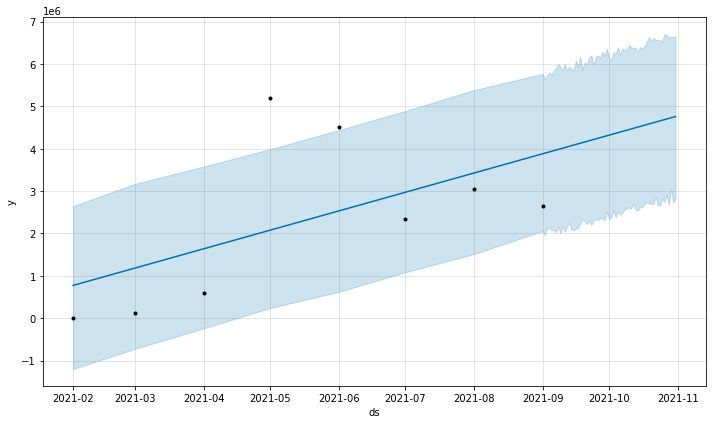

In [ ]:
m = Prophet(seasonality_mode='additive').fit(df_month)
future = m.make_future_dataframe(periods=60)
fcst = m.predict(future)
fig = m.plot(fcst)

In [ ]:
fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
63,2021-10-27,4.700755e+06,2.903391e+06,6.680741e+06
64,2021-10-28,4.715403e+06,2.679114e+06,6.621257e+06
65,2021-10-29,4.730052e+06,3.038435e+06,6.631250e+06
66,2021-10-30,4.744700e+06,2.722849e+06,6.642580e+06
67,2021-10-31,4.759349e+06,2.818323e+06,6.647603e+06


El algoritmo Prophet mensual predijo un movimiento de $ 4.759.349 para el mes de Octubre.

## Forecast Dia

In [ ]:
daily = Prophet(seasonality_mode='additive').fit(df_daily)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


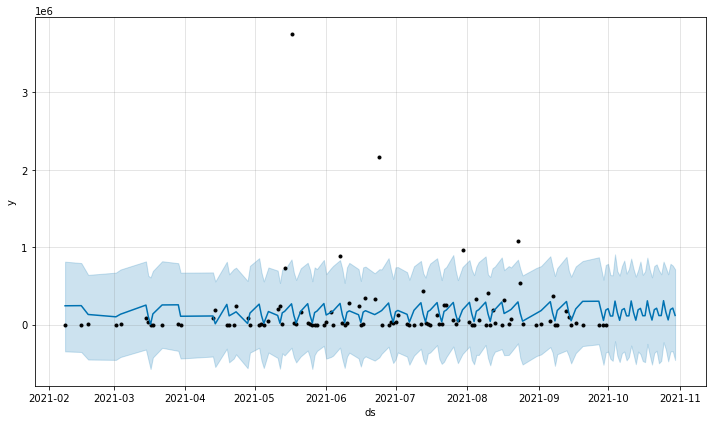

In [ ]:
future_daily = daily.make_future_dataframe(periods=30)
forecast_daily = daily.predict(future_daily)
fig = daily.plot(forecast_daily)

In [ ]:
forecast_daily[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]['yhat'][-30:].sum()

4918538.35352777

El algoritmo Prophet utlizando valores diarios, este predijo un movimiento total de $ 4.918.538,35352777 para el mes de Octubre.

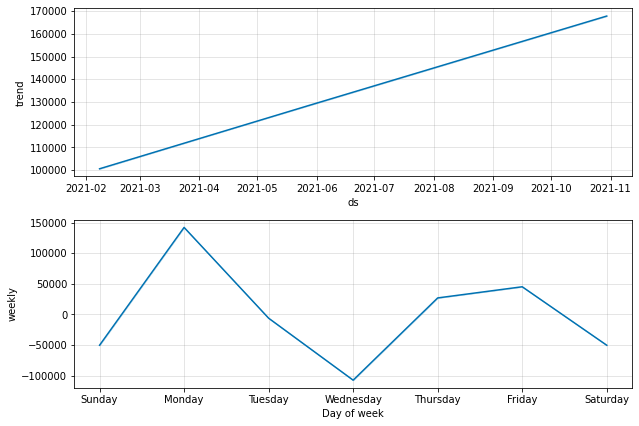

In [ ]:
fig2= m.plot_components(fcst)